# Make a predictin about the coal production

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor

sns.set()

In [77]:
df = pd.read_csv('../data/cleaned_coalpublic2013.csv')

In [66]:
for column in df.columns:
    print column

MSHA ID
year
mine_name
mine_state
mine_county
mine_status
mine_type
company_type
operation_type
operating_company
operating_company_address
union_code
coal_supply_region
production_(short_tons)
average_employees
labor_hours
log_production


In [ ]:
df.log_production.hist()

In [ ]:
df.mine_status.unique()

In [ ]:
df[['mine_status', 'log_production']].groupby('mine_status').mean()

# Predict the production of coal mines

In [78]:
features = ['average_employees',
            'labor_hours'
            ]
categoricals = ['mine_state',
                'mine_county',
                'mine_status',
                'mine_type',
                'company_type',
                'operation_type',
                'union_code',
                'coal_supply_region'
                ]
response = 'log_production'

In [79]:
X = df[features + categoricals]
y = df[response]

In [80]:
X = pd.get_dummies(X, columns=categoricals, drop_first=True)

In [ ]:
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(x='log_production', y='mine_status', data=df, split=True, inner='stick')

plt.tight_layout()

In [ ]:
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(x='log_production', y='company_type', data=df, split=True, inner='stick')

plt.tight_layout()

In [ ]:
df.company_type.unique()

In [48]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [83]:
model = RandomForestRegressor(n_estimators=100, oob_score=True)

In [84]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [91]:
y_pred = model.predict(X_test)

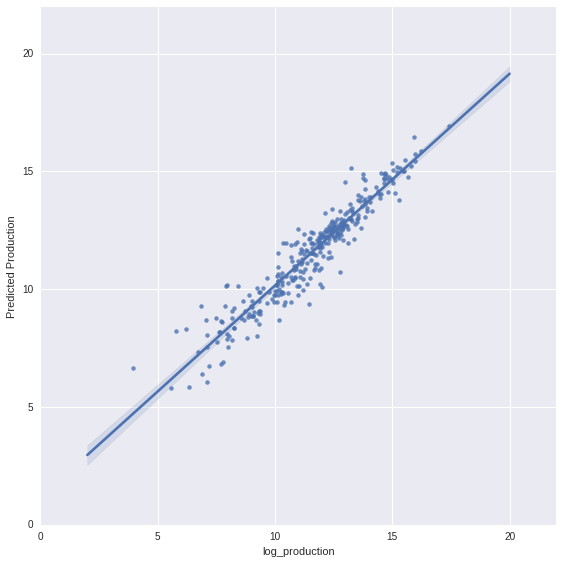

In [92]:
fig = plt.subplots(figsize=(8,8))
sns.regplot(y_test, y_pred)
plt.ylabel('Predicted Production')
plt.xlim(0, 22)
plt.ylim(0, 22)
plt.tight_layout()

In [93]:
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

In [94]:
r2_score(y_true=y_test, y_pred=y_pred)

0.90254110923385567

In [95]:
explained_variance_score(y_test, y_pred=y_pred)

0.9025421885951399

In [96]:
mean_squared_error(y_test, y_pred=y_pred)

0.48581913332053783

In [98]:
model_importances = pd.DataFrame({'name': X.columns,
                                  'importance': model.feature_importances_
                                }).sort_values(by='importance',
                                              ascending=False).reset_index(drop=True)
model_importances.head(20)

,importance,name
0,0.817922,labor_hours
1,0.076233,average_employees
2,0.009496,coal_supply_region_Powder River Basin
3,0.007654,mine_type_Underground
4,0.004077,mine_county_Martin
5,0.003593,mine_type_Surface
6,0.003081,mine_state_West Virginia (Southern)
7,0.002903,coal_supply_region_Appalachia Northern
8,0.002842,mine_status_Temporarily closed
9,0.002811,mine_state_Pennsylvania (Anthracite)
